<a href="https://colab.research.google.com/github/Tushar-2935/Milk-Price-Prediction/blob/main/Milk_price_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
#reading the dataset
data = pd.read_csv('/content/milk_price_prediction_maharashtra_2015_2025_daily_final.csv')
data.head()

,date,state,season,rainfall_mm,inflation_rate,export_volume,feed_cost,labor_rate,government_policy,local_production,demand_index,energy_cost,global_price,animal_health,subsidy,transport_cost,milk_price
0,2015-01-01,Maharashtra,winter,12.483571,3.896461,4001.664795,35.592186,356.210327,subsidy,2945.770341,0.978932,7.315630,48.793891,93.562059,1.430960,3.103368,61.094069
1,2015-01-02,Maharashtra,winter,9.308678,3.983129,4056.907840,36.333893,372.604853,subsidy,2672.721795,1.010986,7.432989,49.639761,97.356018,0.550968,3.340114,61.921785
2,2015-01-03,Maharashtra,winter,13.238443,4.435481,4507.122786,34.596958,374.341391,subsidy,2935.842773,1.040474,7.505414,50.947532,95.134059,0.651760,3.456395,61.656115
3,2015-01-04,Maharashtra,winter,17.615149,3.717504,5122.311907,37.968636,370.869776,no_subsidy,2837.841880,0.998192,6.799274,48.603660,94.732036,0.000000,2.868376,61.704030
4,2015-01-05,Maharashtra,winter,8.829233,3.632619,4375.212579,35.430513,368.944027,subsidy,2873.591549,0.968352,7.098950,48.264406,94.117648,3.595132,3.037267,59.921163


In [ ]:
data.shape

(4018, 17)

In [ ]:
data.describe()

,rainfall_mm,inflation_rate,export_volume,feed_cost,labor_rate,local_production,demand_index,energy_cost,global_price,animal_health,subsidy,transport_cost,milk_price
count,4018.000000,4018.000000,4018.000000,4018.000000,4018.000000,4018.000000,4018.000000,4018.000000,4018.000000,4018.000000,4018.000000,4018.000000,4018.000000
mean,66.874011,5.495127,4656.679158,38.276918,386.093130,3132.772344,1.025805,8.023307,52.625746,95.007215,1.537877,3.406140,65.924864
std,65.723064,0.894424,313.129501,2.021625,13.354209,285.576675,0.052459,0.518759,2.300760,1.506703,1.947603,0.180816,2.489938
min,0.000000,3.443387,3323.388238,32.442046,344.692290,2581.070430,0.880969,6.726635,46.234825,89.936662,0.000000,2.810344,56.868583
25%,11.362917,4.744088,4448.324044,36.824600,376.411819,2911.682201,0.987342,7.601294,50.841947,93.950744,0.000000,3.277815,64.181515
50%,41.006165,5.496740,4661.144186,38.241383,386.096113,3020.186615,1.013685,8.029567,52.638312,95.020298,0.094892,3.406746,65.945397
75%,123.440383,6.244679,4862.653601,39.710152,395.686437,3419.037467,1.059222,8.434052,54.410933,96.037642,3.048649,3.536385,67.665350
max,304.109260,7.451310,5804.500703,47.480134,428.217557,3862.174586,1.200364,9.341647,59.234273,100.205550,5.998614,3.976009,73.701538


In [ ]:
data.isnull().sum() #Checking for null values

,0
date,0
state,0
season,0
rainfall_mm,0
inflation_rate,0
export_volume,0
feed_cost,0
labor_rate,0
government_policy,0
local_production,0


No missing values

In [ ]:
data.dtypes

,0
date,object
state,object
season,object
rainfall_mm,float64
inflation_rate,float64
export_volume,float64
feed_cost,float64
labor_rate,float64
government_policy,object
local_production,float64


In [ ]:
data['date'] = pd.to_datetime(data['date'])

In [ ]:
data.dtypes

,0
date,datetime64[ns]
state,object
season,object
rainfall_mm,float64
inflation_rate,float64
export_volume,float64
feed_cost,float64
labor_rate,float64
government_policy,object
local_production,float64


In [ ]:
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day
data['day_of_week'] = data['date'].dt.dayofweek

In [ ]:
data = pd.get_dummies(data, columns=['season', 'government_policy', 'state'], drop_first=True)

In [ ]:
data.head()

,date,rainfall_mm,inflation_rate,export_volume,feed_cost,labor_rate,local_production,demand_index,energy_cost,global_price,...,subsidy,transport_cost,milk_price,year,month,day,day_of_week,season_summer,season_winter,government_policy_subsidy
0,2015-01-01,12.483571,3.896461,4001.664795,35.592186,356.210327,2945.770341,0.978932,7.315630,48.793891,...,1.430960,3.103368,61.094069,2015,1,1,3,False,True,True
1,2015-01-02,9.308678,3.983129,4056.907840,36.333893,372.604853,2672.721795,1.010986,7.432989,49.639761,...,0.550968,3.340114,61.921785,2015,1,2,4,False,True,True
2,2015-01-03,13.238443,4.435481,4507.122786,34.596958,374.341391,2935.842773,1.040474,7.505414,50.947532,...,0.651760,3.456395,61.656115,2015,1,3,5,False,True,True
3,2015-01-04,17.615149,3.717504,5122.311907,37.968636,370.869776,2837.841880,0.998192,6.799274,48.603660,...,0.000000,2.868376,61.704030,2015,1,4,6,False,True,False
4,2015-01-05,8.829233,3.632619,4375.212579,35.430513,368.944027,2873.591549,0.968352,7.098950,48.264406,...,3.595132,3.037267,59.921163,2015,1,5,0,False,True,True


In [ ]:
data.columns

Index(['date', 'rainfall_mm', 'inflation_rate', 'export_volume', 'feed_cost',
       'labor_rate', 'local_production', 'demand_index', 'energy_cost',
       'global_price', 'animal_health', 'subsidy', 'transport_cost',
       'milk_price', 'year', 'month', 'day', 'day_of_week', 'season_summer',
       'season_winter', 'government_policy_subsidy'],
      dtype='object')

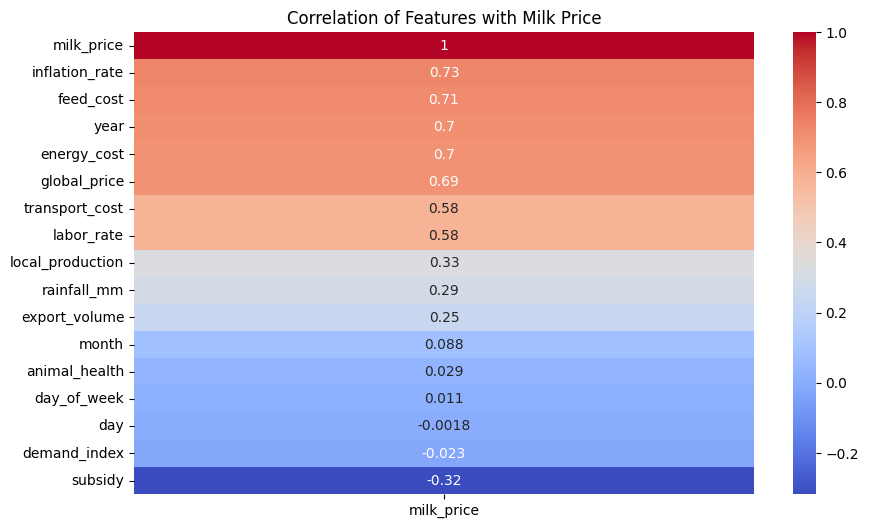

In [ ]:
plt.figure(figsize=(10,6))
corr = data.select_dtypes(include=np.number).corr()
sns.heatmap(corr[['milk_price']].sort_values(by='milk_price', ascending=False), annot=True, cmap='coolwarm')
plt.title("Correlation of Features with Milk Price")
plt.show()

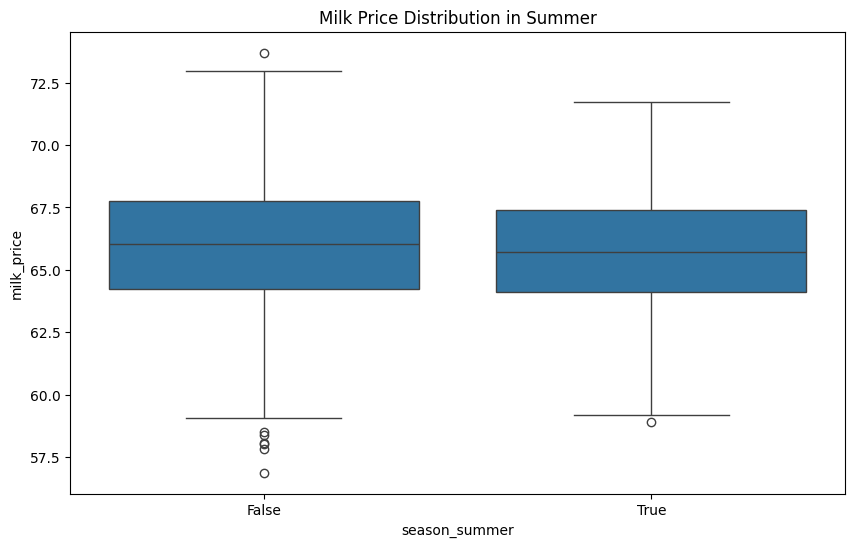

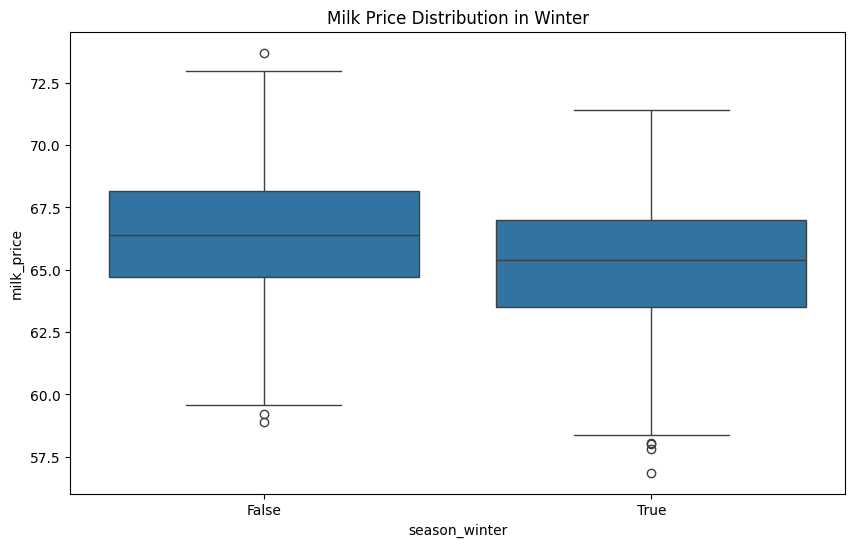

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x='season_summer', y='milk_price', data=data)
plt.title("Milk Price Distribution in Summer")
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(x='season_winter', y='milk_price', data=data)
plt.title("Milk Price Distribution in Winter")
plt.show()

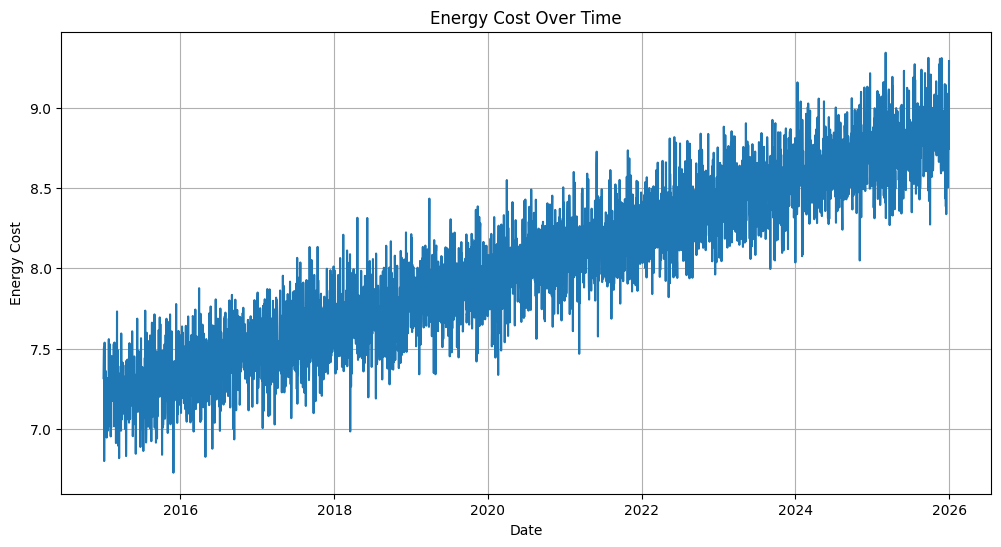

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(data['date'], data['energy_cost'])
plt.xlabel('Date')
plt.ylabel('Energy Cost')
plt.title('Energy Cost Over Time')
plt.grid(True)
plt.show()

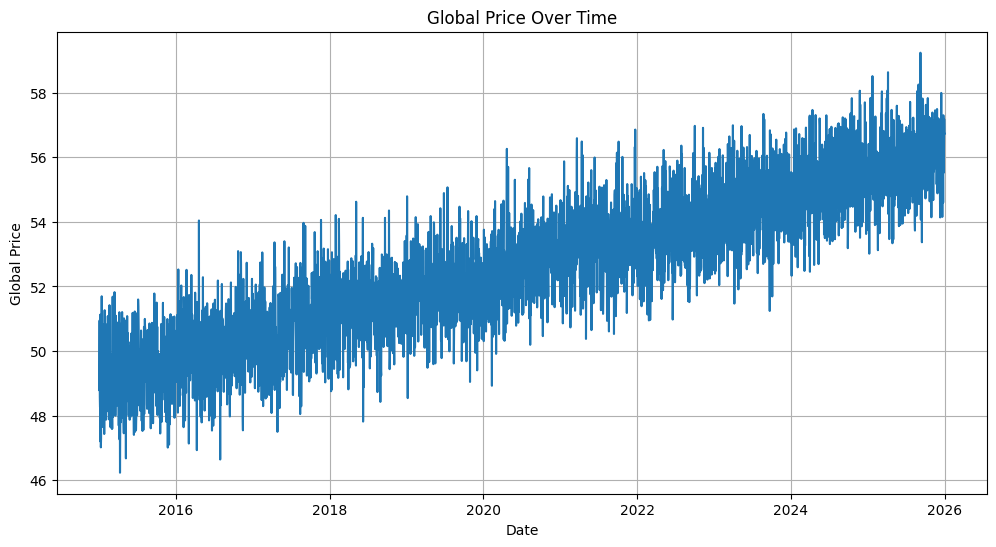

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(data['date'], data['global_price'])
plt.xlabel('Date')
plt.ylabel('Global Price')
plt.title('Global Price Over Time')
plt.grid(True)
plt.show()

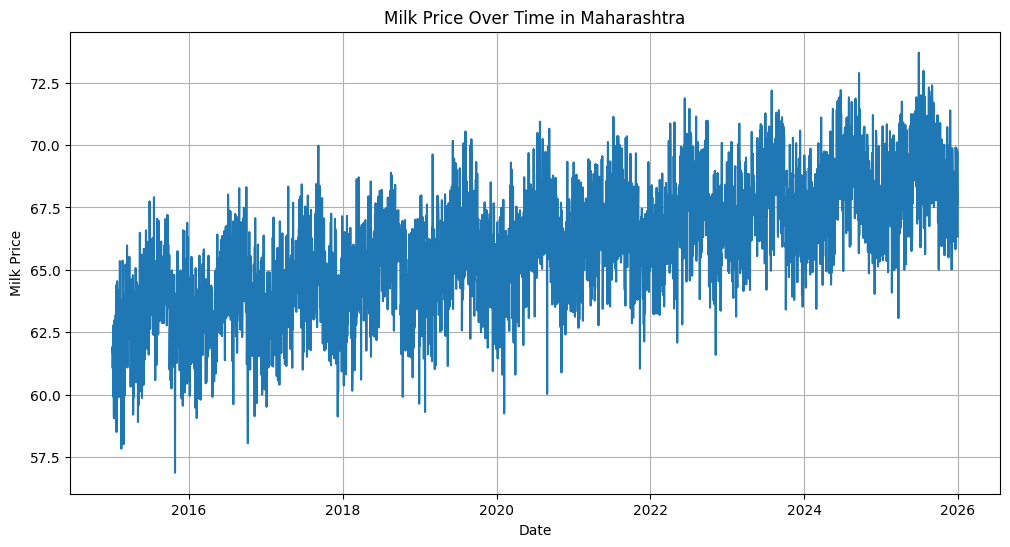

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(data['date'], data['milk_price'])
plt.xlabel('Date')
plt.ylabel('Milk Price')
plt.title('Milk Price Over Time in Maharashtra')
plt.grid(True)
plt.show()

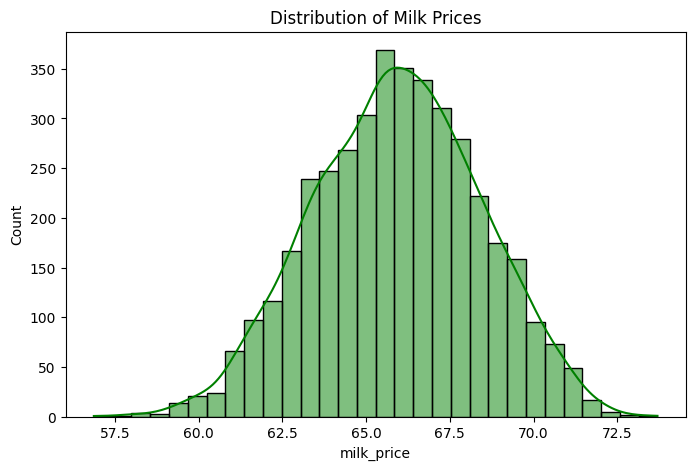

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(data['milk_price'], bins=30, kde=True, color='green')
plt.title("Distribution of Milk Prices")
plt.show()

# **Model**

#**Prophet model**

In [ ]:
#Training prophet model
#Importing libraries
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
prophet_data = data[['date', 'milk_price']].rename(columns={'date': 'ds', 'milk_price': 'y'})
prophet_data_exog = prophet_data.copy()
# Split data into train and test data , data before 2024 is train data and data after 2024 is test data
train = data[data['date'] < '2024-01-01'].copy()
test = data[data['date'] >= '2024-01-01'].copy()

# Fit model on train set
model1 = Prophet(yearly_seasonality=True, daily_seasonality=False)
#Taking variables which have high correlation with milk price
exog_vars = ['inflation_rate', 'feed_cost', 'energy_cost','global_price','transport_cost','labor_rate','local_production','rainfall_mm','export_volume']
for var in exog_vars:
    model1.add_regressor(var) # Add regressors before fitting
model1.fit(train.rename(columns={'date': 'ds', 'milk_price': 'y'}))

# Create future dataframe for test period
future_test = test[['date'] + exog_vars].rename(columns={'date': 'ds'})

# Predict on test set
forecast_test = model1.predict(future_test)

# Evaluate
y_true = test['milk_price'].values
y_pred = forecast_test['yhat'].values

mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print("MAE:", mae)
print("RMSE:", rmse)
print("MAPE (%):", mape)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpu0c18e8p/onrebqlu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpu0c18e8p/hedasol3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18953', 'data', 'file=/tmp/tmpu0c18e8p/onrebqlu.json', 'init=/tmp/tmpu0c18e8p/hedasol3.json', 'output', 'file=/tmp/tmpu0c18e8p/prophet_modelhtc2v__2/prophet_model-20250831151436.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:14:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:14:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


MAE: 1.0305082746354701
RMSE: 1.2958751636424326
MAPE (%): 1.5085996070330745


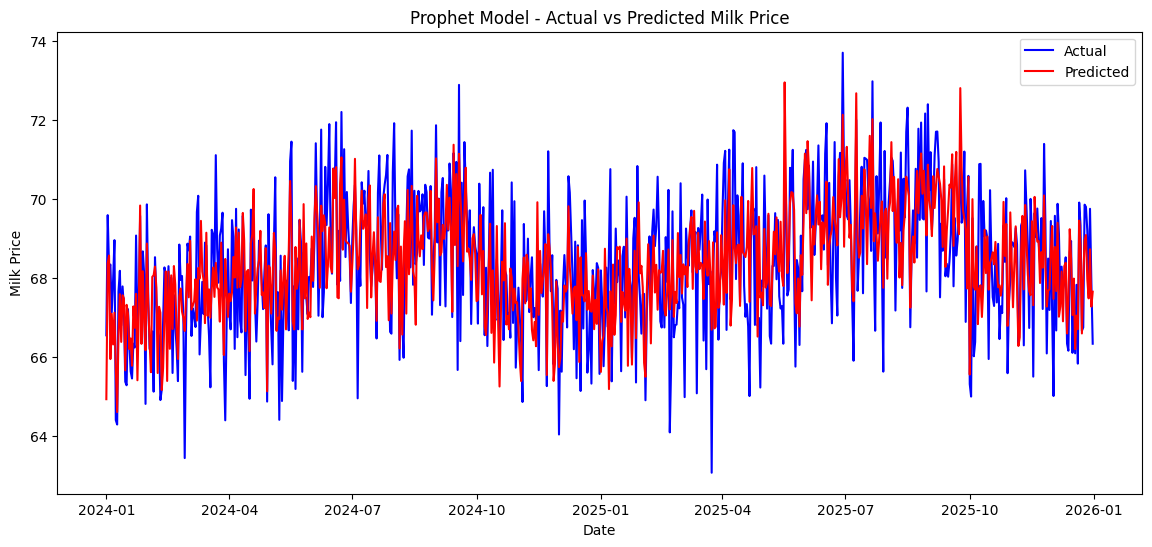

In [ ]:
plt.figure(figsize=(14,6))
plt.plot(test['date'], y_true, label='Actual', color='blue')
plt.plot(test['date'], y_pred, label='Predicted', color='red')
plt.title("Prophet Model - Actual vs Predicted Milk Price")
plt.xlabel("Date")
plt.ylabel("Milk Price")
plt.legend()
plt.show()


In [ ]:
fig1 = plot_plotly(model1, forecast_test)
fig1.show()

In [ ]:
# Refit Prophet on the full dataset (till end of 2025)
model_final = Prophet(yearly_seasonality=True, daily_seasonality=False)
for var in exog_vars:
    model_final.add_regressor(var)

model_final.fit(data.rename(columns={'date': 'ds', 'milk_price': 'y'}))

# Make future dataframe for 365 days beyond last date
future = model_final.make_future_dataframe(periods=365, freq='D')

# Add exogenous variables to future
for var in exog_vars:
    # Simple approach: extend last known value forward
    future[var] = list(data[var].values) + [data[var].values[-1]]*365

# Forecast for 2026
forecast_future = model_final.predict(future)

# Extract 2026 forecast only
forecast_2026 = forecast_future[forecast_future['ds'].dt.year == 2026]

print(forecast_2026[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())


DEBUG:cmdstanpy:input tempfile: /tmp/tmpu0c18e8p/54jmrhcp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpu0c18e8p/5jj8_hdn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4672', 'data', 'file=/tmp/tmpu0c18e8p/54jmrhcp.json', 'init=/tmp/tmpu0c18e8p/5jj8_hdn.json', 'output', 'file=/tmp/tmpu0c18e8p/prophet_modelm_izr0_w/prophet_model-20250831151445.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:14:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:14:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


             ds       yhat  yhat_lower  yhat_upper
4018 2026-01-01  67.869498   66.361743   69.481268
4019 2026-01-02  67.776569   66.220568   69.382512
4020 2026-01-03  67.793919   66.237409   69.511744
4021 2026-01-04  67.770921   66.173509   69.333159
4022 2026-01-05  67.681958   66.008113   69.226707


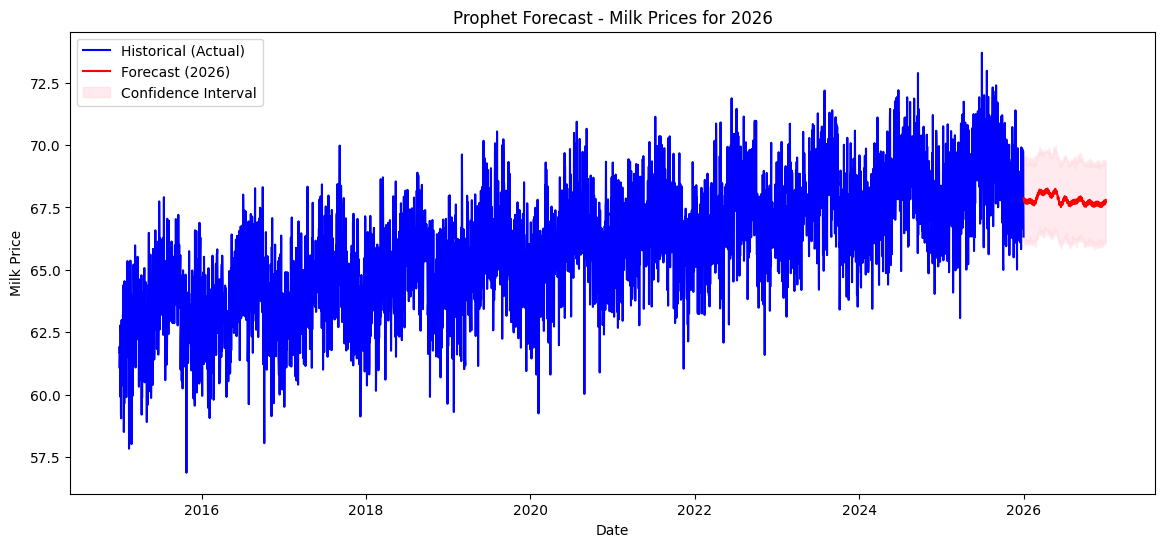

In [ ]:
# Plot forecast for 2026
plt.figure(figsize=(14,6))
plt.plot(data['date'], data['milk_price'], label='Historical (Actual)', color='blue')

# Plot 2026 forecast with confidence interval
plt.plot(forecast_2026['ds'], forecast_2026['yhat'], label='Forecast (2026)', color='red')
plt.fill_between(
    forecast_2026['ds'],
    forecast_2026['yhat_lower'],
    forecast_2026['yhat_upper'],
    color='pink', alpha=0.3, label='Confidence Interval'
)

plt.title("Prophet Forecast - Milk Prices for 2026")
plt.xlabel("Date")
plt.ylabel("Milk Price")
plt.legend()
plt.show()

In [ ]:
forecast_2026 = forecast_future[forecast_future['ds'].dt.year == 2026].copy()
# Monthly average forecast
monthly_forecast = forecast_2026.set_index('ds')['yhat'].resample('M').mean()
print(monthly_forecast)

ds
2026-01-31    67.756164
2026-02-28    67.728039
2026-03-31    68.079848
2026-04-30    68.117156
2026-05-31    68.064379
2026-06-30    67.721270
2026-07-31    67.738570
2026-08-31    67.731077
2026-09-30    67.775214
2026-10-31    67.677470
2026-11-30    67.632982
2026-12-31    67.652281
Freq: ME, Name: yhat, dtype: float64


/tmp/ipython-input-695162529.py:3: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



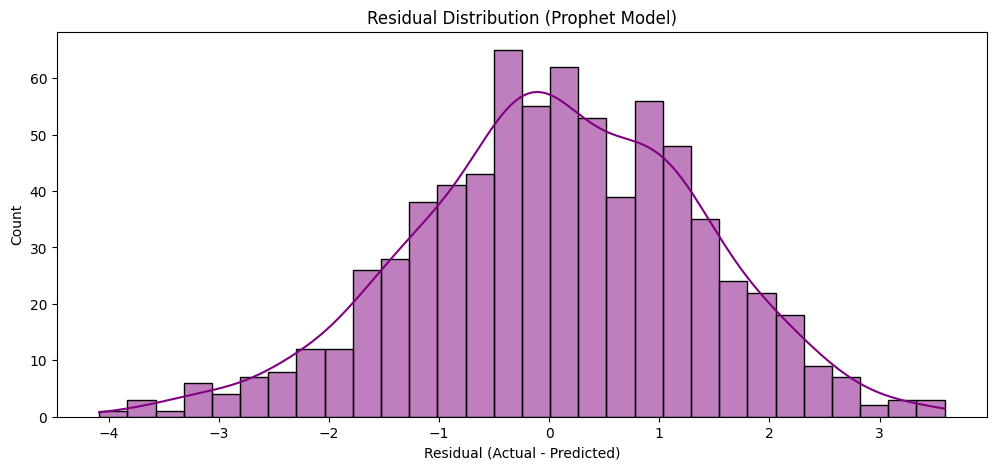

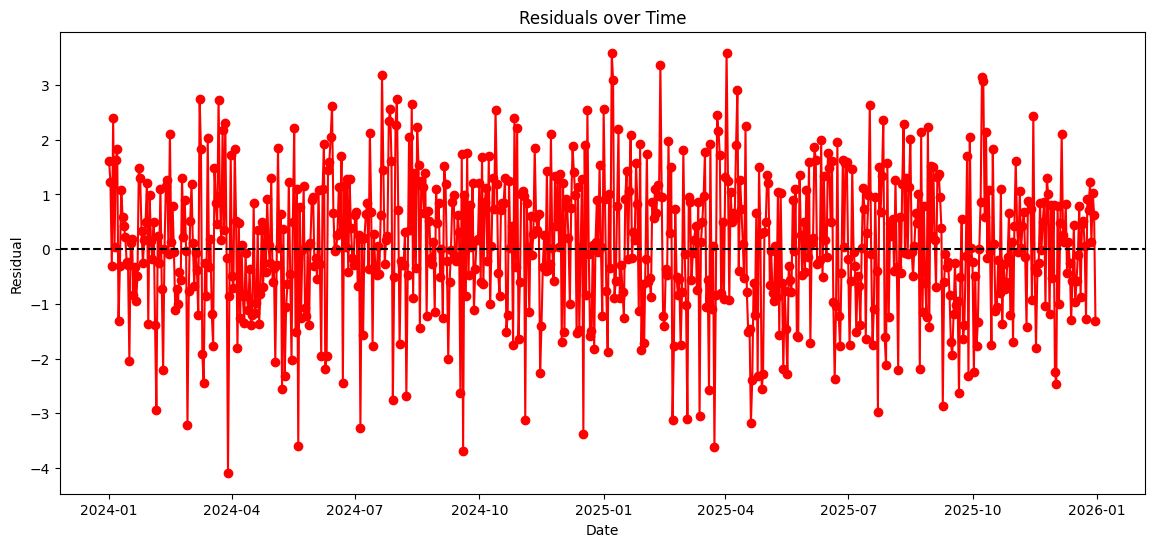

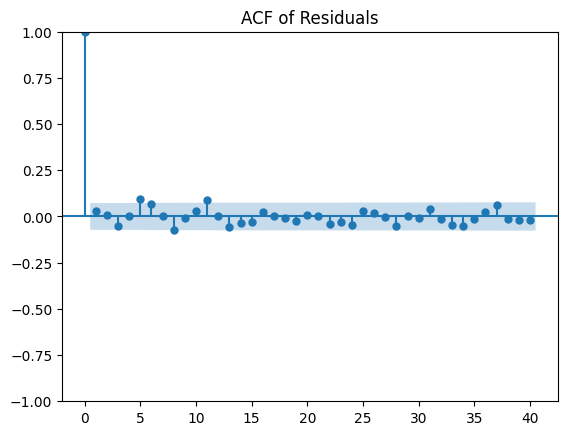

Mean Residual: 0.058801174207438425
Std of Residuals: 1.294540405571463


In [ ]:
import statsmodels.api as sm

# Get residuals from test set
residuals = y_true - y_pred   # from your Prophet test prediction

# 1. Residual distribution
plt.figure(figsize=(12,5))
sns.histplot(residuals, kde=True, bins=30, color="purple")
plt.title("Residual Distribution (Prophet Model)")
plt.xlabel("Residual (Actual - Predicted)")
plt.show()

# 2. Residuals over time
plt.figure(figsize=(14,6))
plt.plot(test['date'], residuals, marker='o', linestyle='-', color="red")
plt.axhline(0, linestyle="--", color="black")
plt.title("Residuals over Time")
plt.xlabel("Date")
plt.ylabel("Residual")
plt.show()

# 3. Autocorrelation of residuals
sm.graphics.tsa.plot_acf(residuals, lags=40)
plt.title("ACF of Residuals")
plt.show()

# 4. Residual summary stats
print("Mean Residual:", np.mean(residuals))
print("Std of Residuals:", np.std(residuals))


1.Residual Distribution (Histogram)

The residuals are centered close to 0 (mean residual ≈ 0.06).

Shape looks roughly bell-curved, though slightly skewed left.

No huge outliers → indicates Prophet captured the trend & seasonality quite well.

Interpretation: Predictions are unbiased overall, only small random noise left.

2.Residuals over Time

The residuals fluctuate randomly around 0, with no strong patterns.

Variance looks stable (no signs of heteroskedasticity).

Occasional spikes, but no systematic upward/downward drift.

Interpretation: Prophet is not missing any obvious trend or recurring seasonality.

3.ACF (Autocorrelation Function)

At lag > 0, nearly all autocorrelation bars fall inside the blue confidence interval.

This means there’s no strong autocorrelation left in residuals.

Interpretation: Prophet has captured most of the time-dependence. Residuals look like white noise.

In [ ]:
#Scenario analysis for best and worst cases
future_2026 = future[future['ds'].dt.year == 2026].copy()

# Create scenario variations
scenarios = {
    "Baseline": future_2026.copy(),
    "Best-Case": future_2026.copy(),
    "Worst-Case": future_2026.copy()
}

# Best-case adjustments
scenarios["Best-Case"]["feed_cost"] *= 0.90   # -10%
scenarios["Best-Case"]["rainfall_mm"] *= 1.10 # +10%
scenarios["Best-Case"]["inflation_rate"] *= 0.95  # -5%
scenarios["Best-Case"]["energy_cost"] *= 0.92
scenarios["Best-Case"]["global_price"] *= 1.05
scenarios["Best-Case"]["transport_cost"] *= 0.93
scenarios["Best-Case"]["labor_rate"] *= 1.03
scenarios["Best-Case"]["local_production"] *= 1.08
scenarios["Best-Case"]["export_volume"] *= 1.06

# Worst-case adjustments
scenarios["Worst-Case"]["feed_cost"] *= 1.15   # +15%
scenarios["Worst-Case"]["rainfall_mm"] *= 0.85 # -15%
scenarios["Worst-Case"]["inflation_rate"] *= 1.10  # +10%
scenarios["Worst-Case"]["energy_cost"] *= 1.12
scenarios["Worst-Case"]["global_price"] *= 0.95
scenarios["Worst-Case"]["transport_cost"] *= 1.10
scenarios["Worst-Case"]["labor_rate"] *= 1.08
scenarios["Worst-Case"]["local_production"] *= 0.90
scenarios["Worst-Case"]["export_volume"] *= 0.93

# Generate forecasts for each scenario
scenario_forecasts = {}
for name, scenario_df in scenarios.items():
    forecast = model1.predict(scenario_df)
    scenario_forecasts[name] = forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]]
    scenario_forecasts[name]["Scenario"] = name

# Combine all forecasts into one DataFrame
all_forecasts = pd.concat(scenario_forecasts.values())

/tmp/ipython-input-2529026000.py:38: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipython-input-2529026000.py:38: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipython-input-2529026000.py:38: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



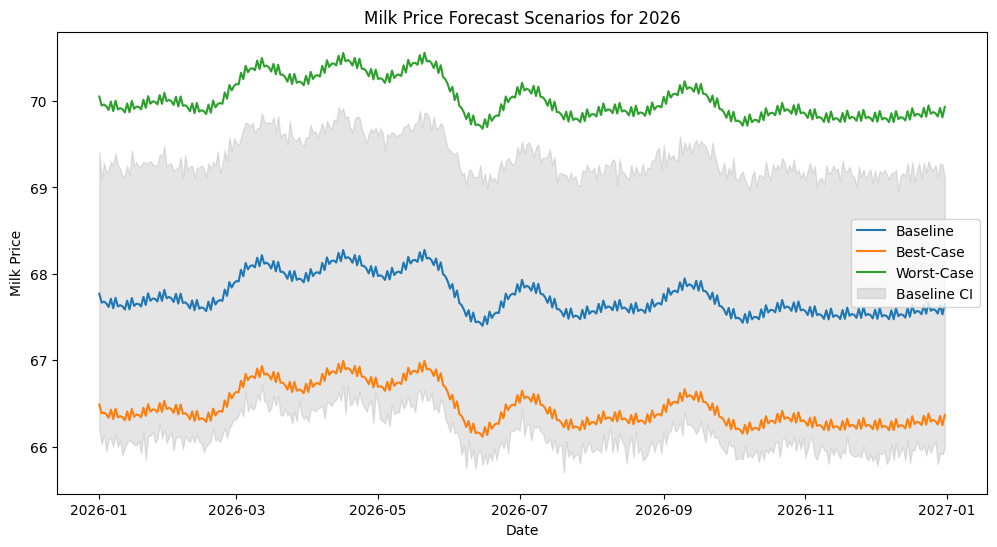

In [ ]:
plt.figure(figsize=(12,6))
for name, forecast in scenario_forecasts.items():
    plt.plot(forecast['ds'], forecast['yhat'], label=name)

plt.fill_between(
    scenario_forecasts["Baseline"]['ds'],
    scenario_forecasts["Baseline"]['yhat_lower'],
    scenario_forecasts["Baseline"]['yhat_upper'],
    color="gray", alpha=0.2, label="Baseline CI"
)

plt.title("Milk Price Forecast Scenarios for 2026")
plt.xlabel("Date")
plt.ylabel("Milk Price")
plt.legend()
plt.show()

In [ ]:
# Convert forecasts into monthly averages
monthly_summary = (
    all_forecasts
    .groupby([all_forecasts['ds'].dt.to_period('M'), "Scenario"])["yhat"]
    .mean()
    .reset_index()
)

# Pivot for easy comparison
monthly_summary = monthly_summary.pivot(index="ds", columns="Scenario", values="yhat")
monthly_summary.index = monthly_summary.index.astype(str)  # format YYYY-MM
print(monthly_summary.head(12))  # first 12 months of 2026

Scenario   Baseline  Best-Case  Worst-Case
ds                                        
2026-01   67.682074  66.399628   69.961947
2026-02   67.693754  66.411308   69.973626
2026-03   68.038959  66.756513   70.318831
2026-04   68.105089  66.822643   70.384961
2026-05   68.078174  66.795728   70.358046
2026-06   67.616640  66.334194   69.896512
2026-07   67.670207  66.387761   69.950080
2026-08   67.611545  66.329099   69.891418
2026-09   67.762737  66.480291   70.042609
2026-10   67.560859  66.278414   69.840732
2026-11   67.535458  66.253013   69.815331
2026-12   67.558456  66.276010   69.838328


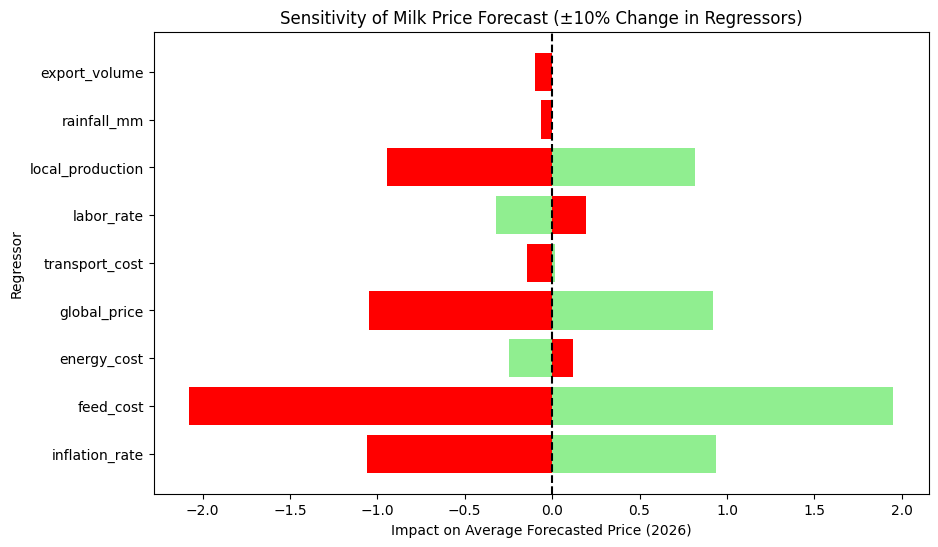

In [ ]:
# Baseline forecast for 2026
baseline_forecast = forecast_2026.copy()
baseline_mean = baseline_forecast['yhat'].mean()

sensitivity_results = {}

# Variables to test
exog_vars = ['inflation_rate', 'feed_cost', 'energy_cost',
             'global_price', 'transport_cost', 'labor_rate',
             'local_production', 'rainfall_mm', 'export_volume']

for var in exog_vars:
    for shock, label in [(1.1, "+10%"), (0.9, "-10%")]:
        future_test = future_2026.copy()
        future_test[var] = future_test[var] * shock

        forecast_shock = model1.predict(future_test)
        shock_mean = forecast_shock['yhat'].mean()

        sensitivity_results[(var, label)] = shock_mean - baseline_mean

# Convert results to DataFrame
sens_df = pd.DataFrame(sensitivity_results.items(),
                       columns=['Scenario', 'Impact'])
sens_df[['Variable','Shock']] = pd.DataFrame(sens_df['Scenario'].tolist(),
                                             index=sens_df.index)
sens_df.drop(columns=['Scenario'], inplace=True)

# Plot tornado chart
plt.figure(figsize=(10,6))
for var in exog_vars:
    subset = sens_df[sens_df['Variable']==var]
    plt.barh(var, subset.loc[subset['Shock']=="+10%", 'Impact'], color='lightgreen')
    plt.barh(var, subset.loc[subset['Shock']=="-10%", 'Impact'], color='red')

plt.axvline(0, color='black', linestyle='--')
plt.title("Sensitivity of Milk Price Forecast (±10% Change in Regressors)")
plt.xlabel("Impact on Average Forecasted Price (2026)")
plt.ylabel("Regressor")
plt.show()


Top drivers of risk/opportunity (2026 forecast):

[Feed Cost, Inflation Rate, Global Price]

Moderate influence:

[Local Production, Energy Cost]

Low influence:

[Rainfall, Export Volume, Transport Cost, Labor Rate]

  0%|          | 0/500 [00:00<?, ?it/s]

/tmp/ipython-input-595178112.py:83: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



              mean       std         p5        p50        p95  prob_gt_70
ds                                                                       
2026-01  68.482312  1.814748  65.470543  68.514400  71.397143    0.203548
2026-02  68.478531  1.820614  65.472516  68.497443  71.406832    0.206071
2026-03  68.835355  1.815956  65.853077  68.852314  71.746605    0.262452
2026-04  68.904138  1.802078  65.872659  68.933388  71.786209    0.272200
2026-05  68.879173  1.812496  65.869207  68.890791  71.829672    0.273613


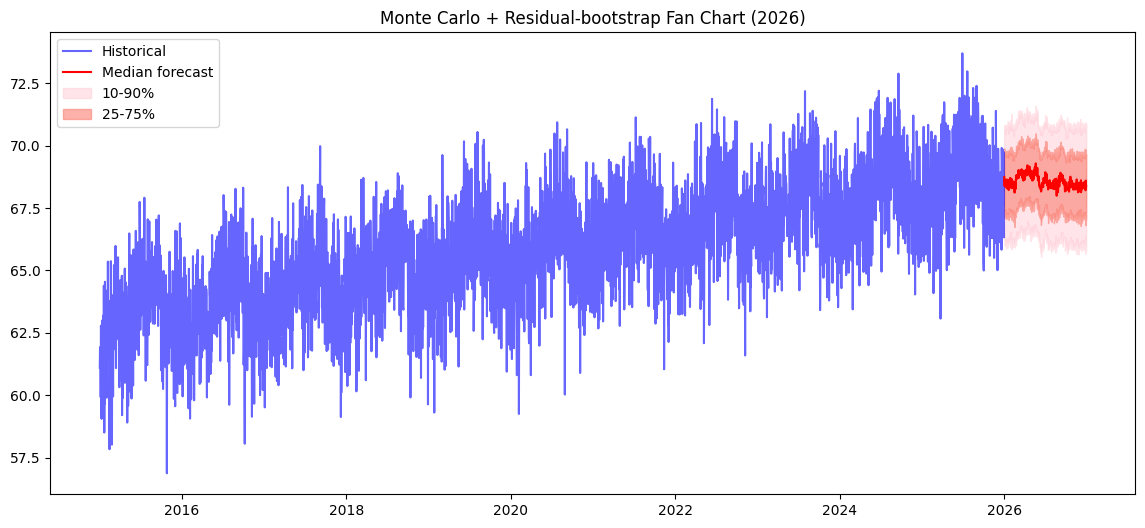

Probability that 2026 average milk price > 70: 0.000


In [ ]:
n_sims = 500               # number of Monte Carlo runs (increase if you want finer estimates)
forecast_days = 365         # days to forecast (2026)
start_date = data['date'].max()  # last observed date
regressors = exog_vars        # list of regressors used in Prophet
model_prophet = model1         # your fitted Prophet model
rng = np.random.default_rng(42)

# Import trange for progress bar
from tqdm.auto import trange

# Create base future df (dates)
future_dates = pd.date_range(start=start_date + pd.Timedelta(days=1),
                             periods=forecast_days, freq='D')
future_base = pd.DataFrame({'ds': future_dates})

#Derive historical stats for regressors (mean, std, covariance)
# Use recent window (e.g., last 365 days) or entire history
hist_window = data[data['date'] > (data['date'].max() - pd.Timedelta(days=365))].copy()
mu = hist_window[regressors].mean().values             # vector of means
sigma = hist_window[regressors].std(ddof=1).values     # std deviations
cov = hist_window[regressors].cov().values            # covariance matrix (for correlated sampling)

# Regularize cov if needed (small diagonal add)
cov += np.eye(len(regressors)) * 1e-6

#Compute residuals from training (to bootstrap noise)
#Get training residuals: actual - prophet_pred on validation/train
#If you have test residuals from earlier, use training residuals for bootstrap
#Example: use residuals array from earlier (residuals_train or residuals). If not:
#Fit/compute preds on in-sample train (or use test residuals)
#Here, assume you have 'train' and predicted 'prophet_train_pred' -> residuals_train.
residuals_train = (train['milk_price'].values -
                   model_prophet.predict(train.rename(columns={'date':'ds','milk_price':'y'}))[ 'yhat'].values)
residuals_train = residuals_train[~np.isnan(residuals_train)]  # clean

#4) Monte Carlo loop: sample regressors and predict
pred_matrix = np.zeros((forecast_days, n_sims))  # store yhat (without residuals), we can later add residual noise

# Option A: Sample regressors independently (simple)
# Option B: Sample regressors jointly using multivariate normal (captures correlations) — used here
for s in trange(n_sims):
    # sample a multivariate draw for the whole forecast horizon:
    # simple approach: assume daily i.i.d. draws from MVN(mu, cov)
    sampled = rng.multivariate_normal(mean=mu, cov=cov, size=forecast_days)
    # build future df for Prophet (must contain all regressors with correct column names)
    fut = future_base.copy()
    for i, r in enumerate(regressors):
        fut[r] = sampled[:, i]
    # optionally you can apply a smoothing or trend to sampled regressors instead of i.i.d.
    # predict with Prophet (no residual added yet)
    pred = model_prophet.predict(fut)['yhat'].values
    pred_matrix[:, s] = pred

#5) Add residual bootstrap (optional)
# For each simulation, add a random residual sampled (with replacement) for each day,
# or add day-specific noise sampled from residuals distribution.
# We'll sample residuals_i.i.d. from residuals_train
resid_samples = rng.choice(residuals_train, size=(forecast_days, n_sims), replace=True)
pred_matrix_with_noise = pred_matrix + resid_samples

#6) Aggregate results: percentiles and probabilities
percentiles = [1, 5, 10, 25, 50, 75, 90, 95, 99]
quantiles = np.percentile(pred_matrix_with_noise, q=percentiles, axis=1)  # shape: (len(percentiles), days)

# Build result DataFrame
res_df = pd.DataFrame({
    'ds': future_dates
})
for i, p in enumerate(percentiles):
    res_df[f'p{p}'] = quantiles[i, :]

# compute mean & std
res_df['mean'] = pred_matrix_with_noise.mean(axis=1)
res_df['std'] = pred_matrix_with_noise.std(axis=1)

# Example: probability that price > 70 each day
threshold = 70
prob_gt_70 = (pred_matrix_with_noise > threshold).mean(axis=1)
res_df['prob_gt_70'] = prob_gt_70

# ---- 7) Monthly aggregation of distributions (means / percentiles) ----
res_df.set_index('ds', inplace=True)
monthly = res_df.resample('M').agg({
    'mean': 'mean',
    'std': 'mean',
    'p5': 'mean',
    'p50': 'mean',
    'p95': 'mean',
    'prob_gt_70': 'mean'
})
monthly.index = monthly.index.to_period('M').astype(str)
print(monthly.head())

# ---- 8) Plot fan chart (daily) ----
plt.figure(figsize=(14,6))
plt.plot(data['date'], data['milk_price'], color='blue', alpha=0.6, label='Historical')

# plot median and some percentiles
plt.plot(res_df.index, res_df['p50'], color='red', label='Median forecast')
plt.fill_between(res_df.index, res_df['p10'], res_df['p90'], color='pink', alpha=0.4, label='10-90%')
plt.fill_between(res_df.index, res_df['p25'], res_df['p75'], color='salmon', alpha=0.6, label='25-75%')
plt.plot(res_df.index, res_df['p5'], color='none')  # just to ensure p5 exists
plt.title('Monte Carlo + Residual-bootstrap Fan Chart (2026)')
plt.legend()
plt.show()

# ---- 9) Example: probability over a month
#print("Probability average price in Jan-2026 > 70:",
#     (pred_matrix_with_noise[res_df.index.month==1].mean(axis=0).mean() > 70).mean())  # rough example
yearly_avg_by_sim = pred_matrix_with_noise.mean(axis=0)  # shape: (n_sims,)

# Probability
threshold = 70
prob_year_gt70 = (yearly_avg_by_sim > threshold).mean()

print(f"Probability that 2026 average milk price > {threshold}: {prob_year_gt70:.3f}")
# ---- 10) Save results
res_df.reset_index().to_csv('montecarlo_forecast_2026_daily.csv', index=False)
monthly.to_csv('montecarlo_forecast_2026_monthly_summary.csv')

# **Random Forest**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
# Features (exogenous variables + lag features)
exog_vars = ['inflation_rate', 'feed_cost', 'energy_cost',
             'global_price', 'transport_cost', 'labor_rate',
             'local_production', 'rainfall_mm', 'export_volume']

# Add lag features (milk price shifted by previous days)
data['lag1'] = data['milk_price'].shift(1)
data['lag7'] = data['milk_price'].shift(7)
data['lag30'] = data['milk_price'].shift(30)

# Drop NaN rows caused by lagging
data_ml = data.dropna().copy()

X = data_ml[exog_vars + ['lag1', 'lag7', 'lag30']]
y = data_ml['milk_price']

# Train-test split (train before 2024, test from 2024 onwards)
X_train = X[data_ml['date'] < '2024-01-01']
y_train = y[data_ml['date'] < '2024-01-01']
X_test = X[data_ml['date'] >= '2024-01-01']
y_test = y[data_ml['date'] >= '2024-01-01']

# Train Random Forest
rf_model = RandomForestRegressor(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

In [ ]:
# Evaluation
mae = mean_absolute_error(y_test, y_pred_rf)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mape = np.mean(np.abs((y_test - y_pred_rf) / y_test)) * 100

print("Random Forest Results")
print("MAE:", mae)
print("RMSE:", rmse)
print("MAPE (%):", mape)

Random Forest Results
MAE: 1.135354242479035
RMSE: 1.4036215500103044
MAPE (%): 1.6548781835127115


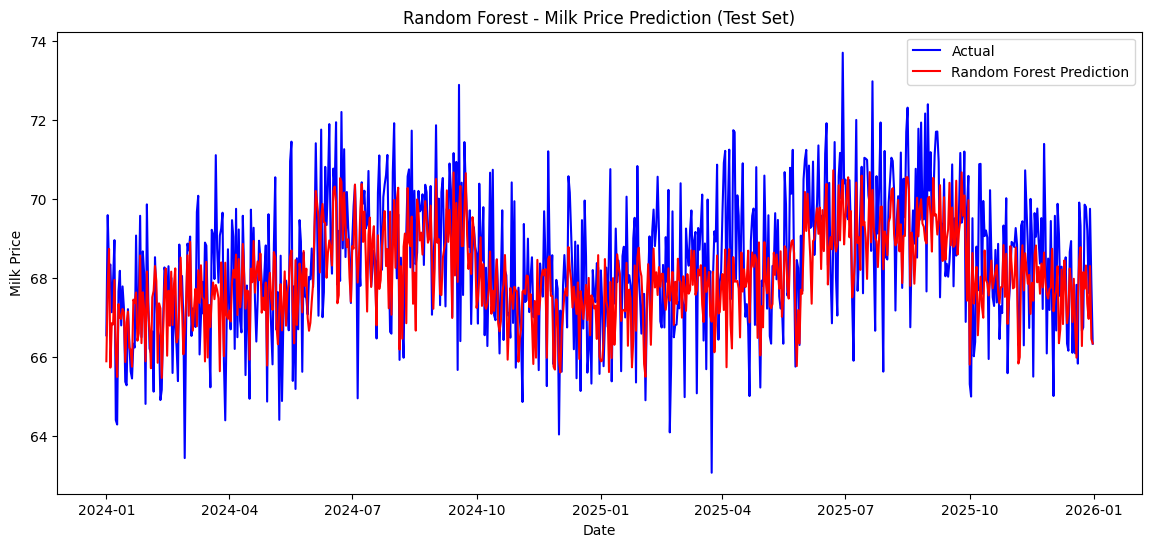

In [ ]:
import matplotlib.pyplot as plt

# Plot actual vs predicted
plt.figure(figsize=(14,6))
plt.plot(data_ml['date'][data_ml['date'] >= '2024-01-01'], y_test, label='Actual', color='blue')
plt.plot(data_ml['date'][data_ml['date'] >= '2024-01-01'], y_pred_rf, label='Random Forest Prediction', color='red')

plt.title("Random Forest - Milk Price Prediction (Test Set)")
plt.xlabel("Date")
plt.ylabel("Milk Price")
plt.legend()
plt.show()


# **XG boost**

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
from xgboost import XGBRegressor, plot_importance

# Features
exog_vars = ['inflation_rate', 'feed_cost', 'energy_cost',
             'global_price', 'transport_cost', 'labor_rate',
             'local_production', 'rainfall_mm', 'export_volume']

# Add lag features
data['lag1'] = data['milk_price'].shift(1)
data['lag7'] = data['milk_price'].shift(7)
data['lag30'] = data['milk_price'].shift(30)

data_ml = data.dropna().copy()

X = data_ml[exog_vars + ['lag1', 'lag7', 'lag30']]
y = data_ml['milk_price']

# Train-test split
X_train = X[data_ml['date'] < '2024-01-01']
y_train = y[data_ml['date'] < '2024-01-01']
X_test = X[data_ml['date'] >= '2024-01-01']
y_test = y[data_ml['date'] >= '2024-01-01']

# Train XGBoost
xgb_model = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb_model.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)


In [ ]:
# Evaluation
mae = mean_absolute_error(y_test, y_pred_xgb)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
mape = np.mean(np.abs((y_test - y_pred_xgb) / y_test)) * 100

print("XGBoost Results")
print("MAE:", mae)
print("RMSE:", rmse)
print("MAPE (%):", mape)


XGBoost Results
MAE: 1.1058194431017174
RMSE: 1.3792556757892989
MAPE (%): 1.6134679914441366


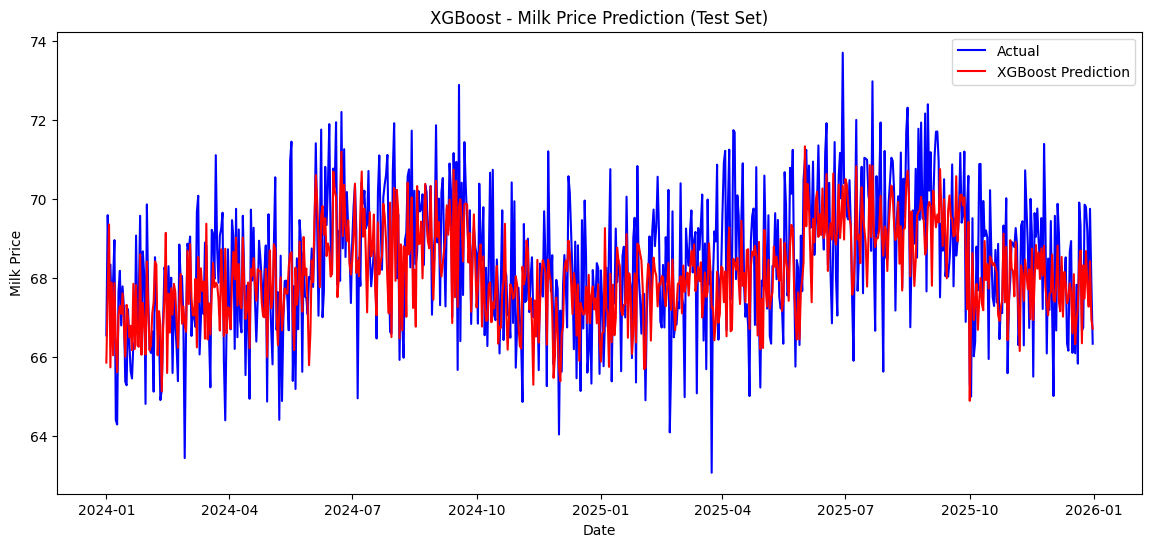

In [ ]:
plt.figure(figsize=(14,6))
plt.plot(data_ml['date'][data_ml['date'] >= '2024-01-01'], y_test, label="Actual", color="blue")
plt.plot(data_ml['date'][data_ml['date'] >= '2024-01-01'], y_pred_xgb, label="XGBoost Prediction", color="red")
plt.title("XGBoost - Milk Price Prediction (Test Set)")
plt.xlabel("Date")
plt.ylabel("Milk Price")
plt.legend()
plt.show()

<Figure size 1000x600 with 0 Axes>

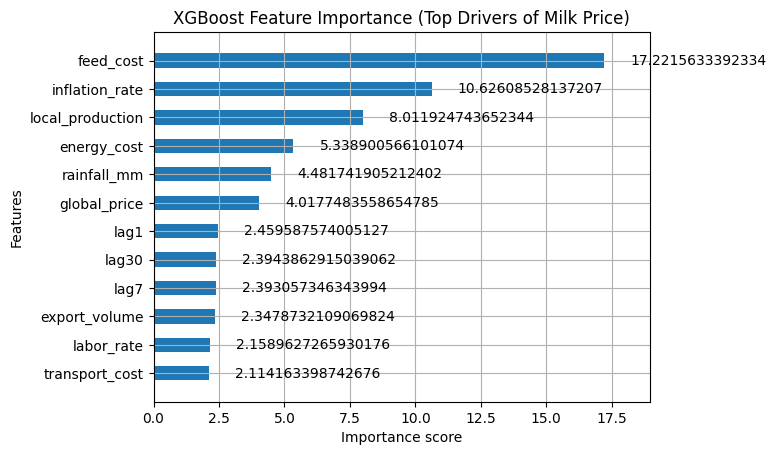

In [ ]:
plt.figure(figsize=(10,6))
plot_importance(xgb_model, importance_type="gain", max_num_features=15, height=0.5)
plt.title("XGBoost Feature Importance (Top Drivers of Milk Price)")
plt.show()


#**Hybrid Model - Prophet + XG boost**

In [ ]:
#Prophet Model
prophet_data = data[['date', 'milk_price']].rename(columns={'date': 'ds', 'milk_price': 'y'})
exog_vars = ['inflation_rate', 'feed_cost', 'energy_cost',
             'global_price', 'transport_cost', 'labor_rate',
             'local_production', 'rainfall_mm', 'export_volume']

# Train-test split
train = data[data['date'] < '2024-01-01'].copy()
test = data[data['date'] >= '2024-01-01'].copy()

# Fit Prophet
model_p = Prophet(yearly_seasonality=True, daily_seasonality=False)
for var in exog_vars:
    model_p.add_regressor(var)
model_p.fit(train.rename(columns={'date': 'ds', 'milk_price': 'y'}))

# Prophet prediction on test set
future_test = test[['date'] + exog_vars].rename(columns={'date': 'ds'})
forecast_p = model_p.predict(future_test)
prophet_pred = forecast_p['yhat'].values

# Step 2: Residuals for the training data
# Add lag features to the original data first
data['lag1'] = data['milk_price'].shift(1)
data['lag7'] = data['milk_price'].shift(7)
data['lag30'] = data['milk_price'].shift(30)

# Drop NaN rows caused by lagging
data_ml = data.dropna().copy()

# Align the train/test split with the lagged data
train_ml = data_ml[data_ml['date'] < '2024-01-01'].copy()
test_ml = data_ml[data_ml['date'] >= '2024-01-01'].copy()

# Get the dates and regressors from the lagged training data for Prophet prediction
train_dates_ml = train_ml[['date'] + exog_vars].rename(columns={'date': 'ds'})

# Predict with Prophet on the lagged training dates
forecast_train_p = model_p.predict(train_dates_ml)

# Align prophet predictions with train_ml data based on date
prophet_train_pred_aligned = forecast_train_p.set_index('ds').reindex(train_ml['date']).reset_index()['yhat'].values


# Calculate residuals for the lagged training data
residuals_train = train_ml['milk_price'].values - prophet_train_pred_aligned


# Step 3: XGBoost on Residuals
X_train_ml = train_ml[exog_vars + ['lag1', 'lag7', 'lag30']]
X_test_ml = test_ml[exog_vars + ['lag1', 'lag7', 'lag30']]


xgb_model = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb_model.fit(X_train_ml, residuals_train)

# Predict residuals on test set
xgb_residuals_pred = xgb_model.predict(X_test_ml)


# Step 4: Hybrid Forecast
final_pred = prophet_pred + xgb_residuals_pred

DEBUG:cmdstanpy:input tempfile: /tmp/tmpu0c18e8p/ut6aj9jp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpu0c18e8p/ia2r49gv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54388', 'data', 'file=/tmp/tmpu0c18e8p/ut6aj9jp.json', 'init=/tmp/tmpu0c18e8p/ia2r49gv.json', 'output', 'file=/tmp/tmpu0c18e8p/prophet_model2_bzenew/prophet_model-20250831152204.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:22:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:22:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Evaluation
y_true = test_ml['milk_price'].values # Use test_ml for y_true
mae = mean_absolute_error(y_true, final_pred)
rmse = np.sqrt(mean_squared_error(y_true, final_pred))
mape = np.mean(np.abs((y_true - final_pred) / y_true)) * 100

print("Hybrid Prophet + XGBoost Results")
print("MAE:", mae)
print("RMSE:", rmse)
print("MAPE (%):", mape)

Hybrid Prophet + XGBoost Results
MAE: 1.0618895666688277
RMSE: 1.3332675703278374
MAPE (%): 1.553756383708799


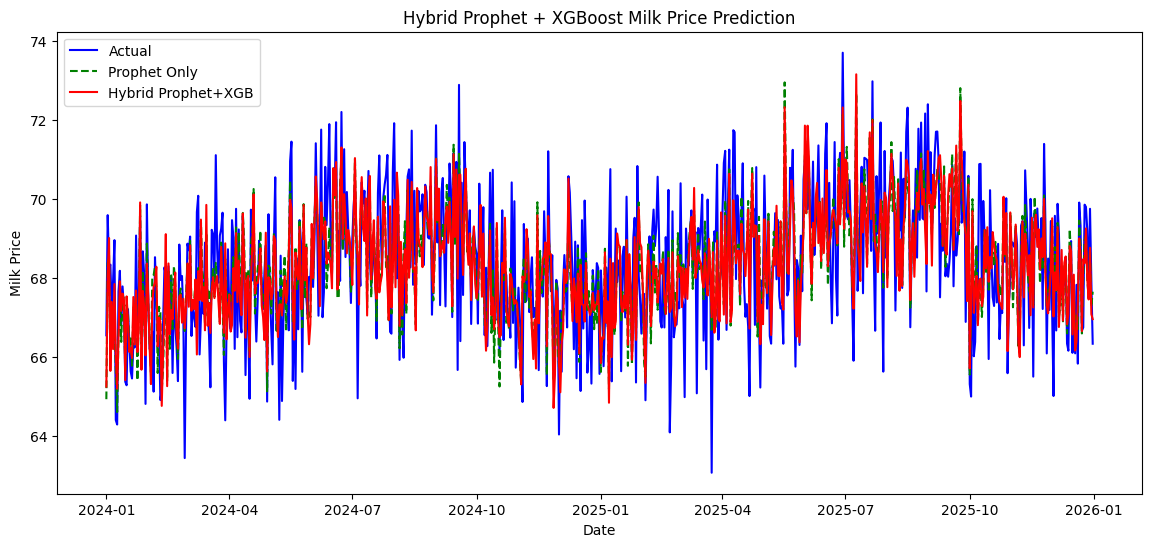

In [ ]:
# Plot Results
plt.figure(figsize=(14,6))
plt.plot(test_ml['date'], y_true, label="Actual", color="blue")
plt.plot(test['date'], prophet_pred, label="Prophet Only", color="green", linestyle="--")
plt.plot(test_ml['date'], final_pred, label="Hybrid Prophet+XGB", color="red")
plt.title("Hybrid Prophet + XGBoost Milk Price Prediction")
plt.xlabel("Date")
plt.ylabel("Milk Price")
plt.legend()
plt.show()

Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression
exog_vars = ['inflation_rate', 'feed_cost', 'energy_cost','global_price', 'transport_cost', 'labor_rate','local_production', 'rainfall_mm', 'export_volume']
X = data[exog_vars]
y = data['milk_price']

# Train-test split (same as before: train until 2024, test from 2024 onward)
X_train = X[data['date'] < '2024-01-01']
X_test = X[data['date'] >= '2024-01-01']
y_train = y[data['date'] < '2024-01-01']
y_test = y[data['date'] >= '2024-01-01']

lr_model = LinearRegression()
lr_model.fit(X_train,y_train)

y_pred_lr = lr_model.predict(X_test)

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print("Linear Regression Results:")
print("MAE:", mae)
print("RMSE:", rmse)
print("MAPE (%):", mape)

Linear Regression Results:
MAE: 1.0305082746354701
RMSE: 1.2958751636424326
MAPE (%): 1.5085996070330745


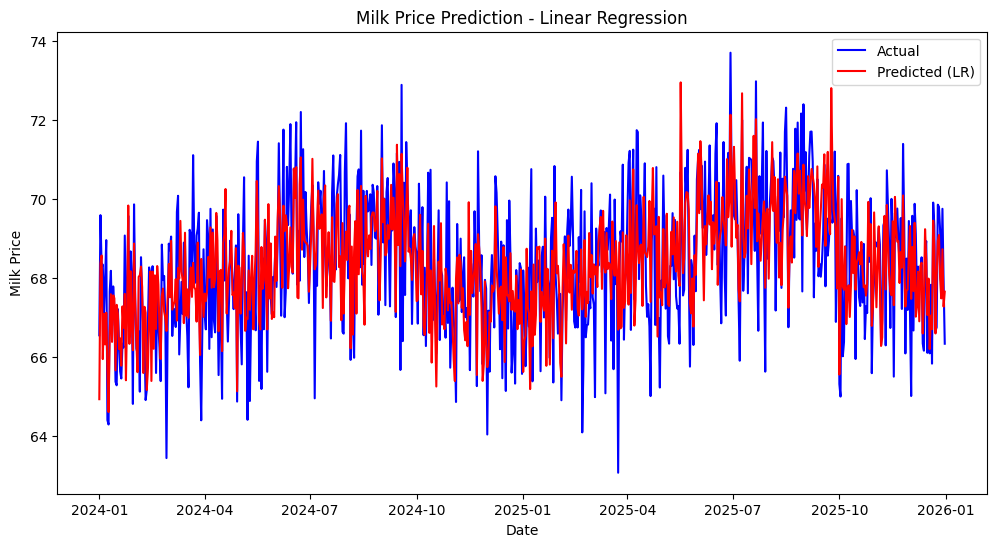

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(data['date'][data['date'] >= '2024-01-01'], y_test, label='Actual', color='blue')
plt.plot(data['date'][data['date'] >= '2024-01-01'], y_pred, label='Predicted (LR)', color='red')
plt.title("Milk Price Prediction - Linear Regression")
plt.xlabel("Date")
plt.ylabel("Milk Price")
plt.legend()
plt.show()

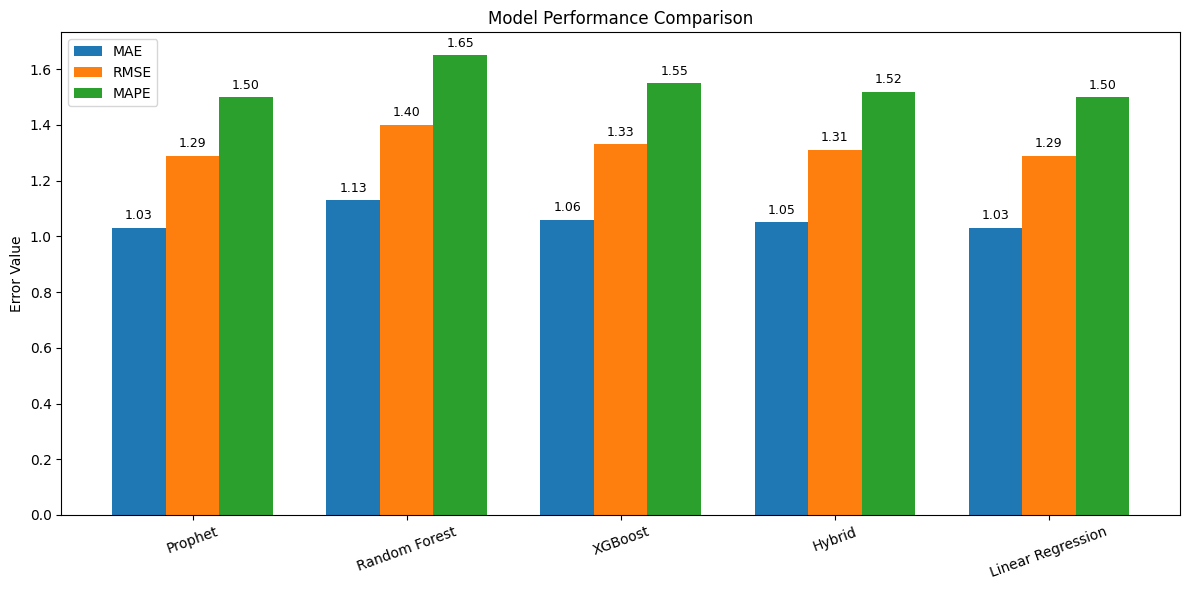

In [ ]:
results = {
    "Prophet": {"MAE": 1.03, "RMSE": 1.29, "MAPE": 1.50},
    "Random Forest": {"MAE": 1.13, "RMSE": 1.40, "MAPE": 1.65},
    "XGBoost": {"MAE": 1.06, "RMSE": 1.33, "MAPE": 1.55},
    "Hybrid": {"MAE": 1.05, "RMSE": 1.31, "MAPE": 1.52},
    "Linear Regression": {"MAE": 1.03, "RMSE": 1.29, "MAPE": 1.50}  # from your LR run
}
metrics = ["MAE", "RMSE", "MAPE"]
x = np.arange(len(results))  # number of models
width = 0.25  # bar width

fig, ax = plt.subplots(figsize=(12,6))

bars = []
for i, metric in enumerate(metrics):
    values = [results[model][metric] for model in results]
    b = ax.bar(x + i*width, values, width, label=metric)
    bars.append((b, values))

# Add values on top of bars
for b, values in bars:
    for rect, val in zip(b, values):
        ax.text(
            rect.get_x() + rect.get_width()/2,
            rect.get_height() + 0.02,
            f"{val:.2f}",
            ha="center", va="bottom", fontsize=9
        )

# Formatting
ax.set_xticks(x + width)
ax.set_xticklabels(results.keys(), rotation=20)
ax.set_ylabel("Error Value")
ax.set_title("Model Performance Comparison")
ax.legend()
plt.tight_layout()
plt.show()

Prophet model is performing the best